# RANDOM VARIABLE DISTRIBUTIONS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import PowerTransformer, Normalizer

In [2]:
customer = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


**1.Get the numerical variables from our dataset.**

In [3]:
numerical_df = customer.select_dtypes(np.number)

**2.Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.**

In [4]:
def hist_generator(df):
    plt_size = len(df.columns)
    fig, ax = plt.subplots(plt_size, figsize=(12,20))
    n = 0
    for col in df.columns:
        sns.histplot(data = df, x = col, ax = ax[n])
        n +=1
    plt.tight_layout()
    plt.show()

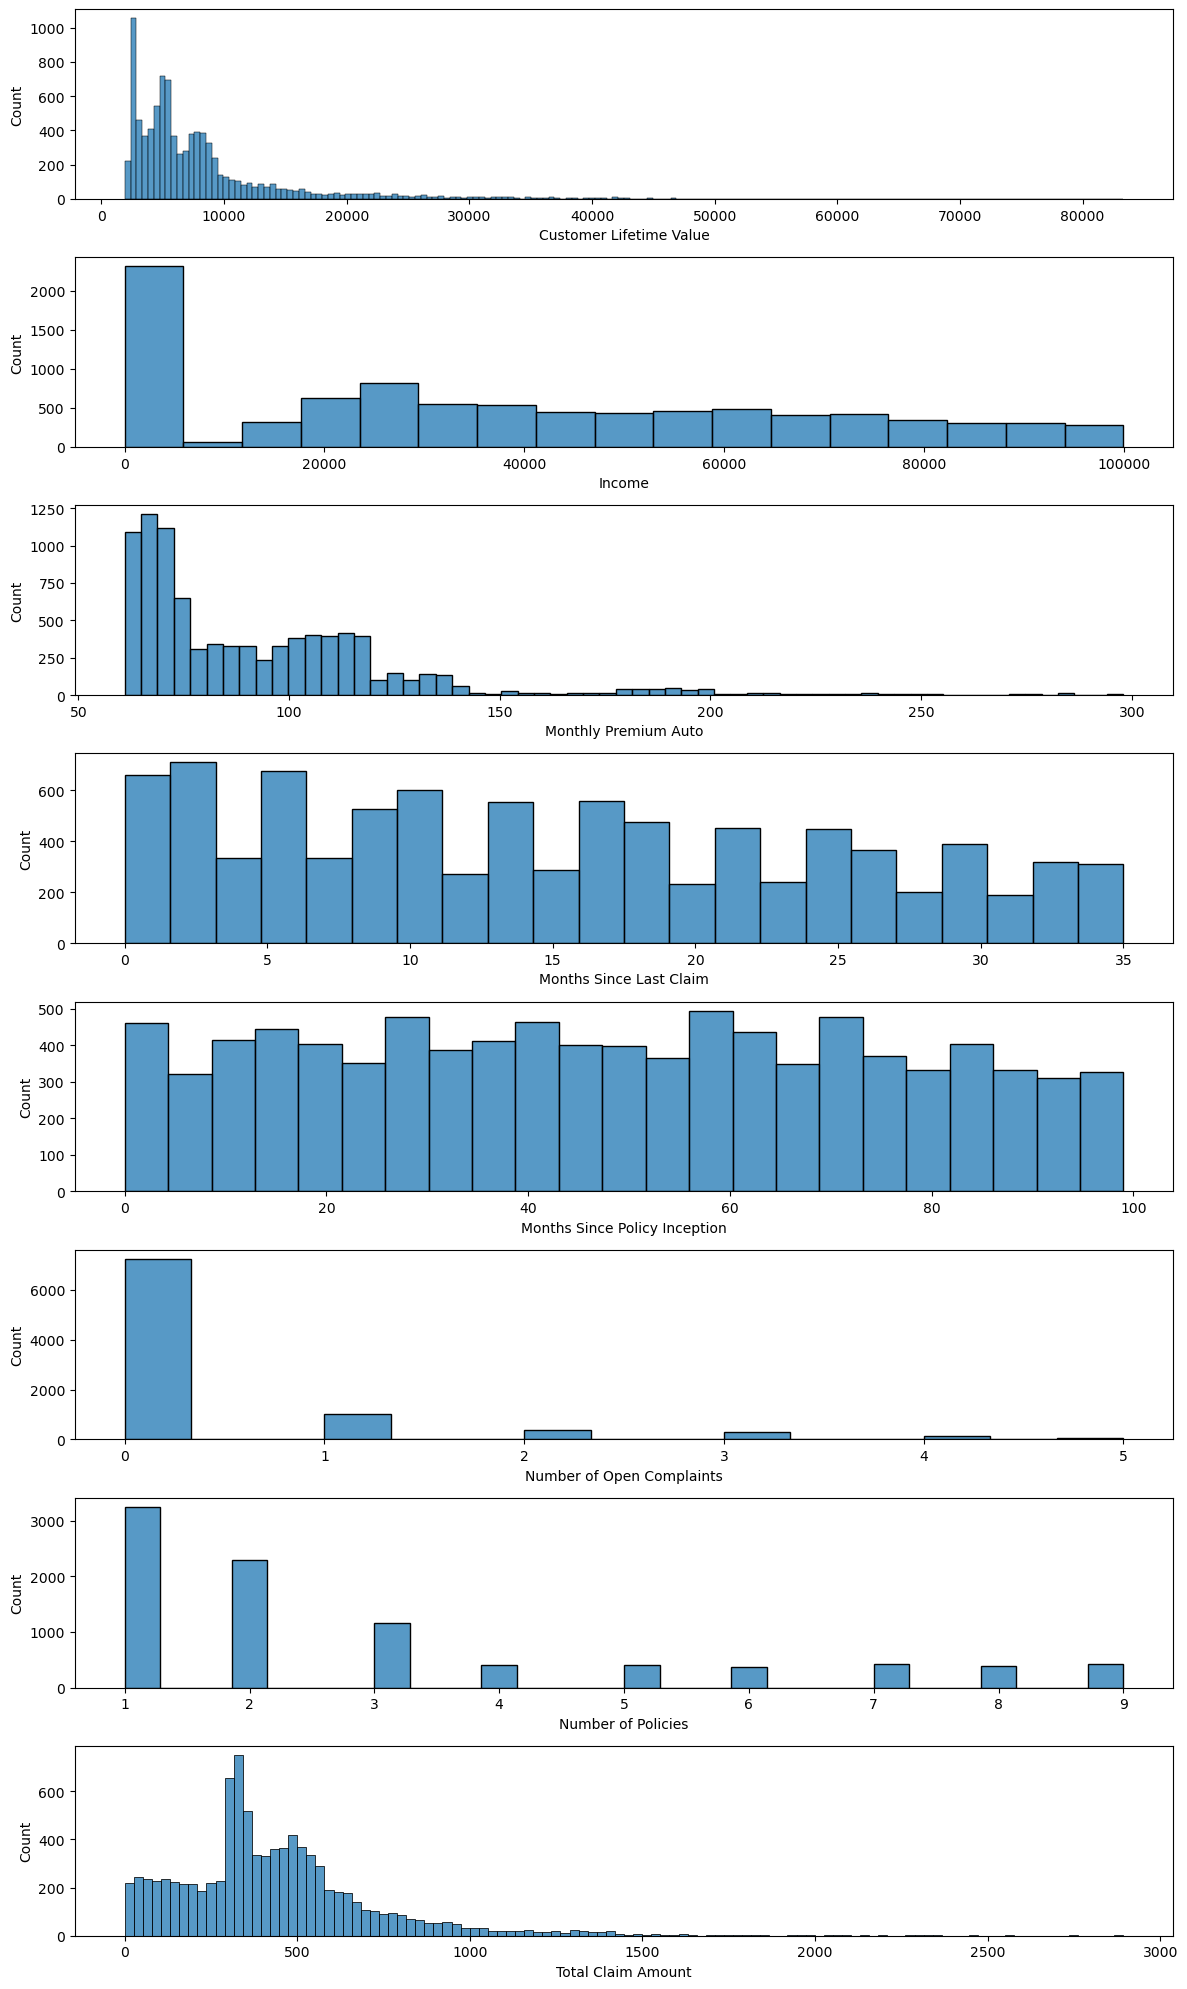

In [5]:
hist_generator(numerical_df)

**3.Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.**

Using log:

In [6]:
def log_transfom(x):
    x = np.log10(x) 
    if np.isfinite(x):
        return x
    else:
        return np.NAN

In [7]:
numerical_log = pd.DataFrame()
numerical_df1 = numerical_df.copy()

for col in numerical_df.columns:
    numerical_log[col] = list(map(log_transfom, numerical_df1[col]))
    numerical_log[col] = numerical_log[col].fillna(np.median(numerical_log[col]))
    

C:\Users\Pablo\AppData\Local\Temp\ipykernel_7084\3771639883.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_7084\3771639883.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_7084\3771639883.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_7084\3771639883.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


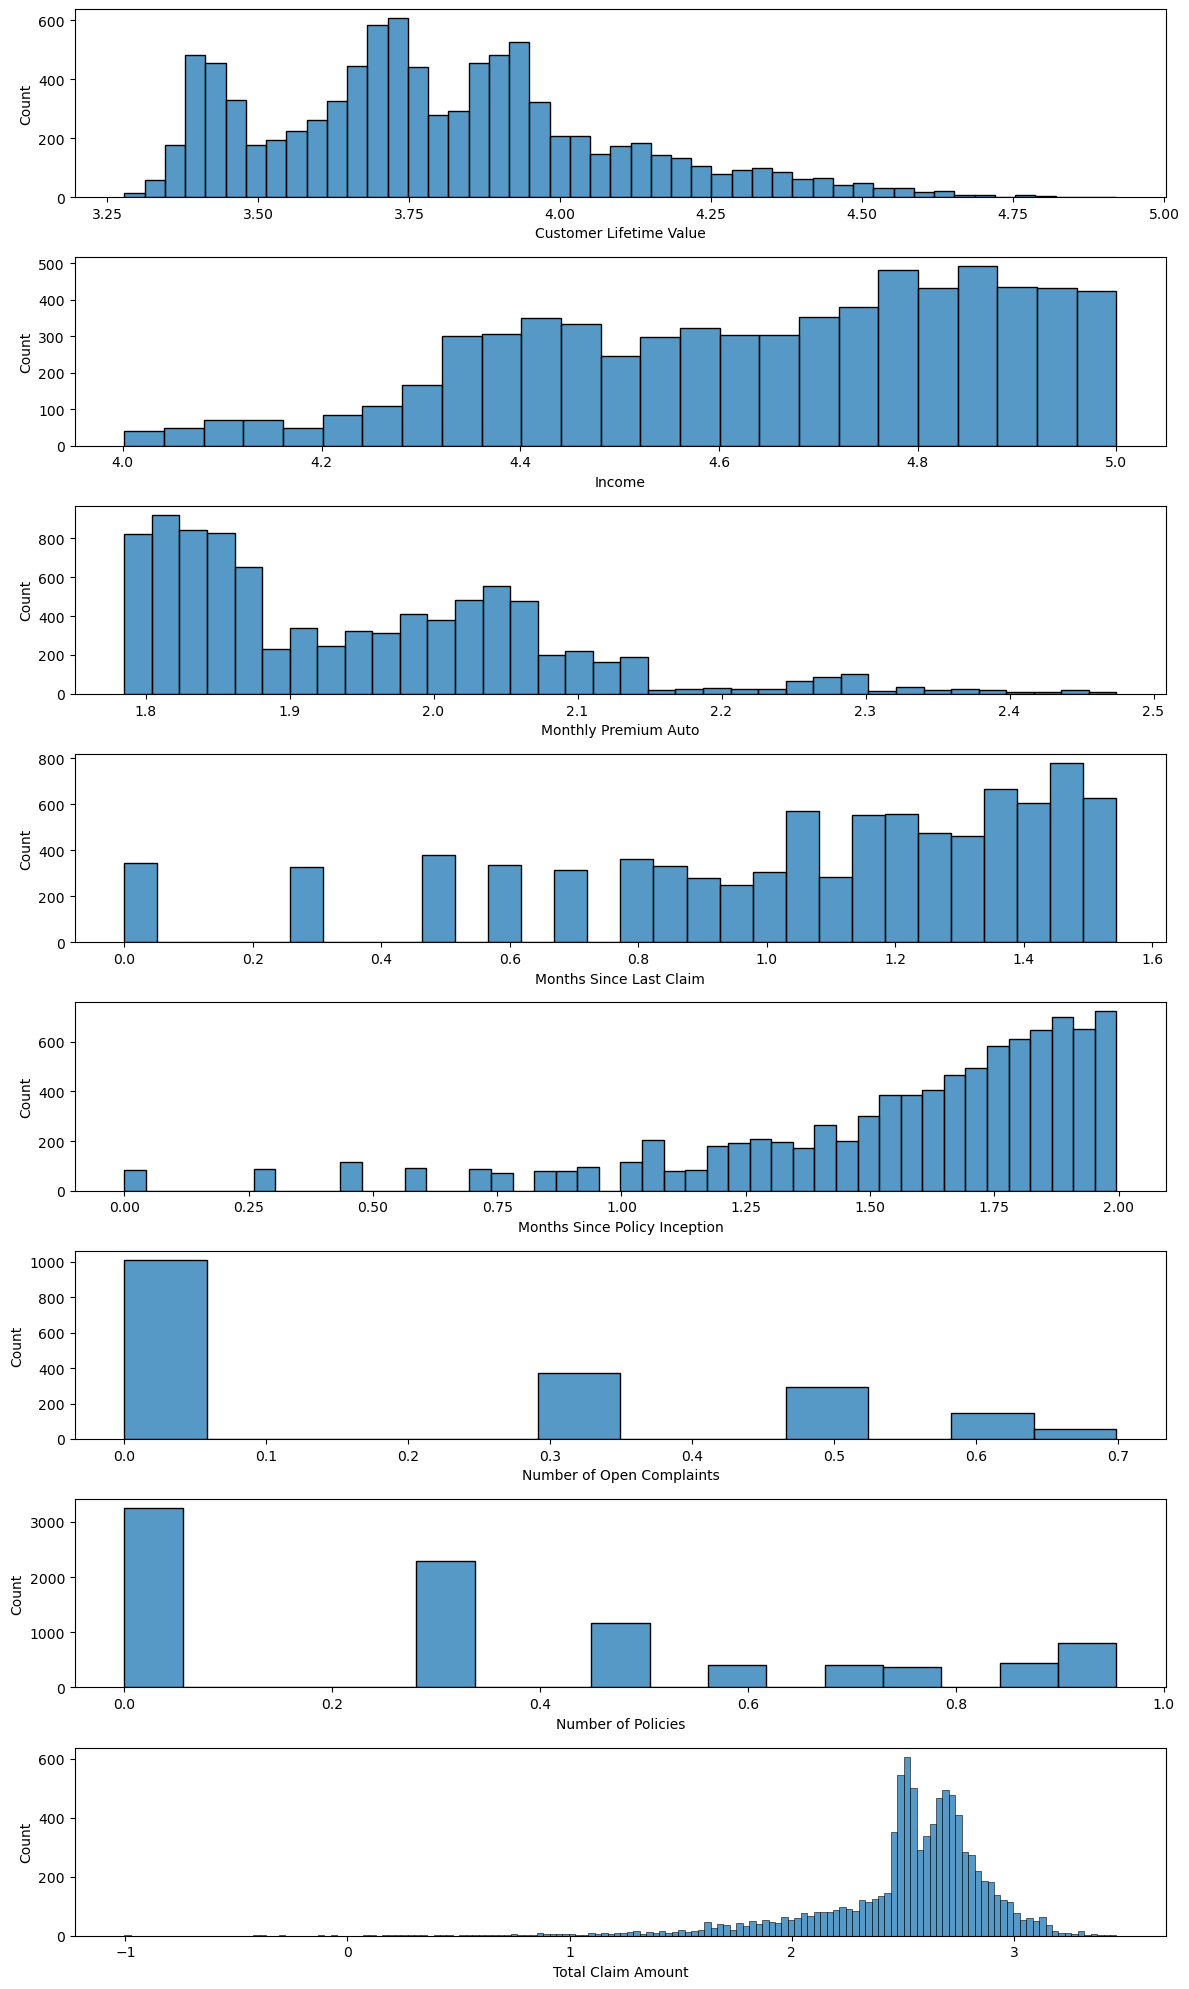

In [8]:
hist_generator(numerical_log)

Now, some distributions that were left skewed are now right skewed, and other has changed in different ways.

Box-Cox can't be applyied because there are some negatives values

Using Power-Transformer with Yeo-Johnson's method:

In [9]:
numerical_df2 = numerical_df.copy()

transformer_power = PowerTransformer().fit(numerical_df2)

numerical_df2_trans = transformer_power.transform(numerical_df2)

numerical_pw_trans = pd.DataFrame(numerical_df2_trans, columns=numerical_df.columns)

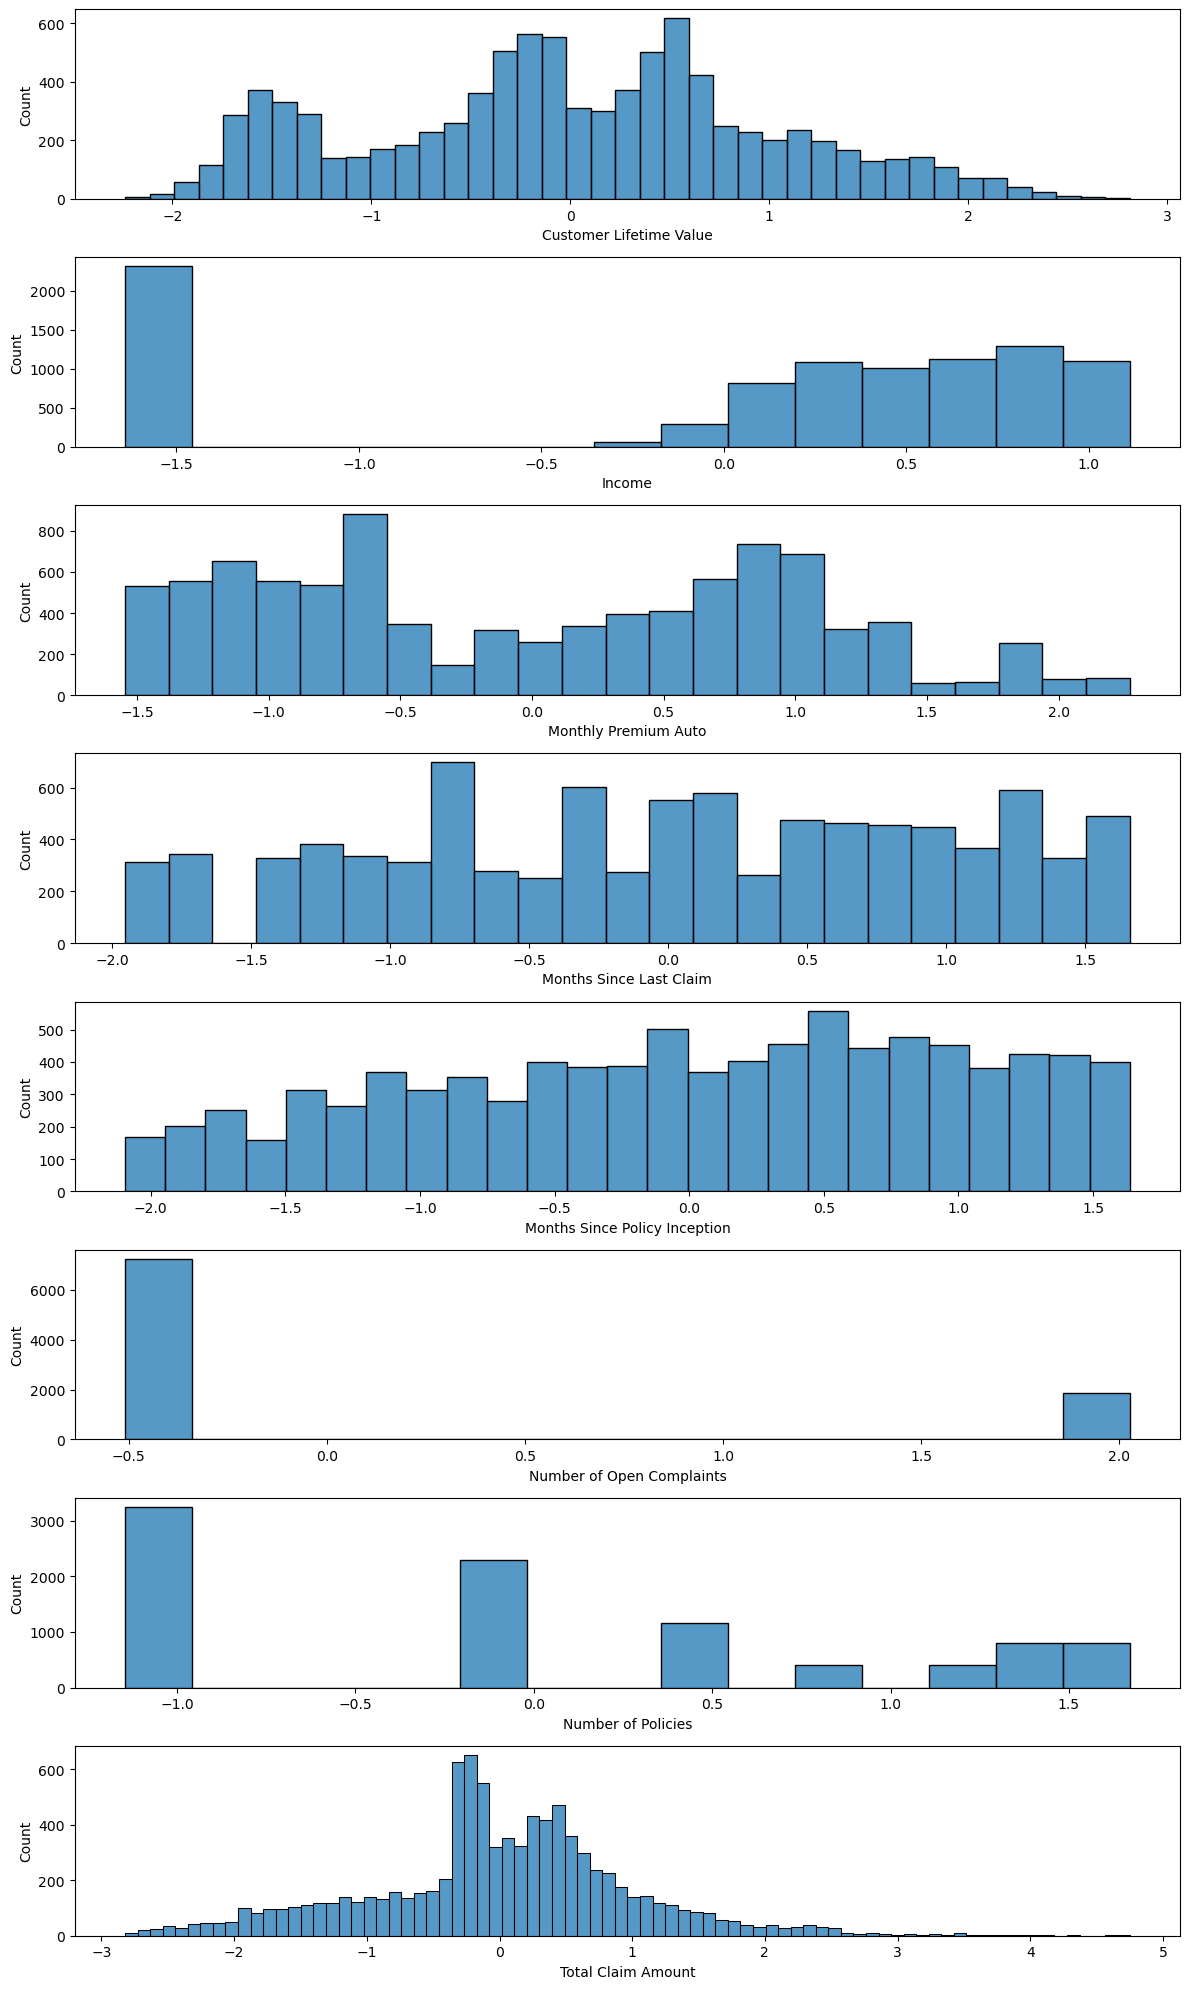

In [10]:
hist_generator(numerical_pw_trans)

After applying the power transformer the distributions seem to be more Gaussian-like in general.

Using Normalization by row:

In [11]:
numerical_df3 = numerical_df.copy()

transformer_nor = Normalizer().fit(numerical_df3)

numerical_df3_trans = transformer_nor.transform(numerical_df3)

numerical_norm_trans = pd.DataFrame(numerical_df3_trans, columns=numerical_df.columns)

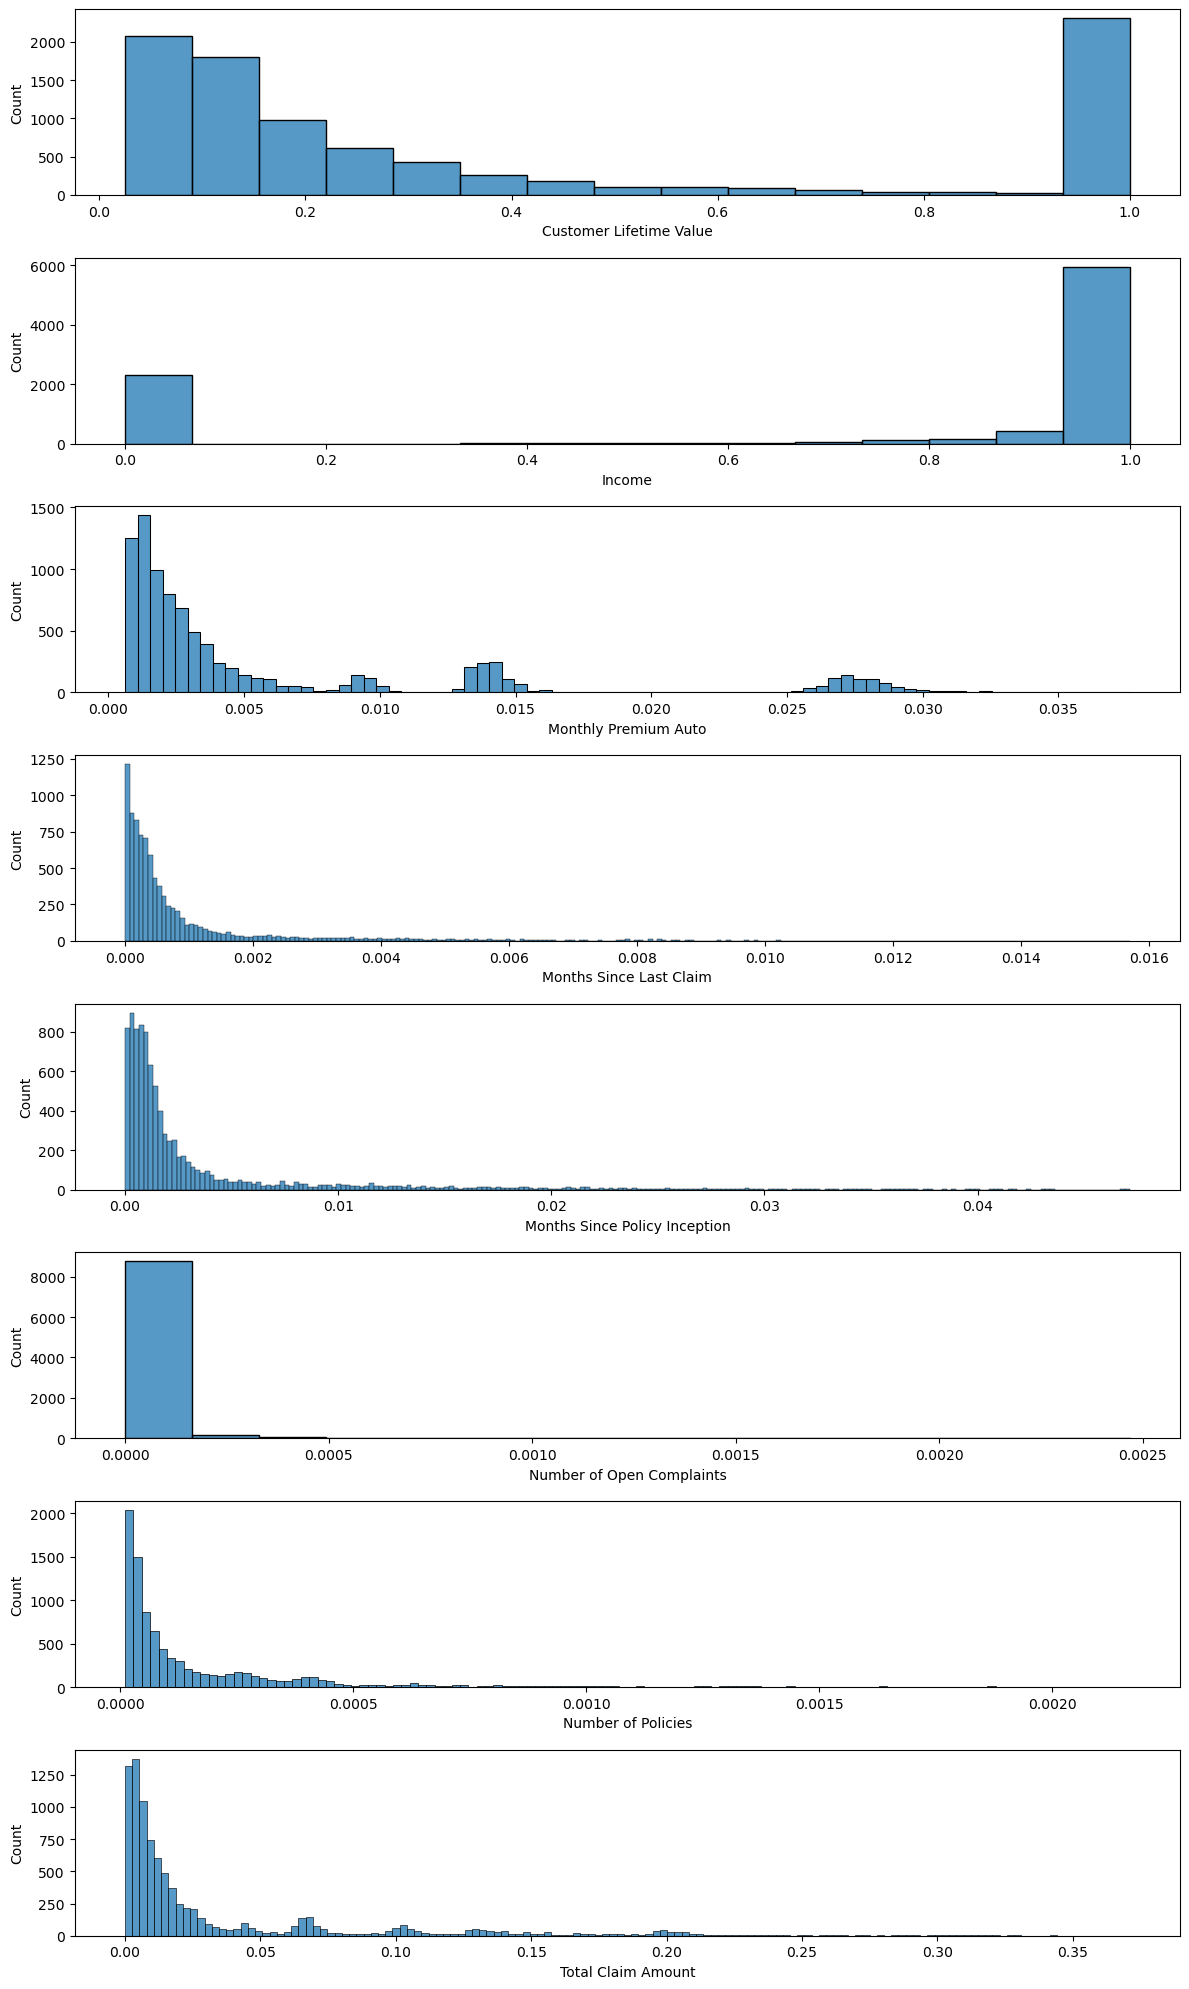

In [12]:
hist_generator(numerical_norm_trans)

It seems that the distributions have become even more left skewed than before.